<h2>Fashion MNIST dataset in Keras library</h2>

<h2>Load data</h2>

In [1]:
# Imports
# - Dataset
from keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Flatten, Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

# Ignore warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Using TensorFlow backend.


Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [2]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


<h2>Build Linear model</h2>

In [3]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(lin_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Linear model on test data</h2>

In [4]:
# Start timer
start = time.time()

# Train model on training data
lin_clf.fit(X_train_1D, y_train, batch_size=32, epochs=8, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/8
60000/60000 [==============================] - 2s 39us/step - loss: 0.5973 - acc: 0.7994
Epoch 2/8
60000/60000 [==============================] - 2s 39us/step - loss: 0.4608 - acc: 0.8424
Epoch 3/8
60000/60000 [==============================] - 2s 39us/step - loss: 0.4349 - acc: 0.8502
Epoch 4/8
60000/60000 [==============================] - 2s 40us/step - loss: 0.4217 - acc: 0.8547
Epoch 5/8
60000/60000 [==============================] - 2s 34us/step - loss: 0.4121 - acc: 0.8573
Epoch 6/8
60000/60000 [==============================] - 2s 34us/step - loss: 0.4065 - acc: 0.8590
Epoch 7/8
60000/60000 [==============================] - 2s 34us/step - loss: 0.4012 - acc: 0.8611
Epoch 8/8
60000/60000 [==============================] - 2s 34us/step - loss: 0.3989 - acc: 0.8619

Test Accuracy: 84.27%
Time elapsed: 17.90 sec


<h2>Build Neural Net model</h2>

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, use_bias=False))
nn_clf.add(BatchNormalization())
nn_clf.add(Activation("elu"))
# - second Dense
nn_clf.add(Dense(128, use_bias=False))
nn_clf.add(BatchNormalization())
nn_clf.add(Activation("elu"))
# - output
nn_clf.add(Dense(10, activation="softmax"))
           
# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(nn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100352    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16384     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

<h2>Train and evaluate Neural Net model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 133us/step - loss: 0.4941 - acc: 0.8242 - val_loss: 0.4240 - val_acc: 0.8521
Epoch 2/15
48000/48000 [==============================] - 6s 123us/step - loss: 0.3922 - acc: 0.8583 - val_loss: 0.4078 - val_acc: 0.8499
Epoch 3/15
48000/48000 [==============================] - 6s 129us/step - loss: 0.3562 - acc: 0.8696 - val_loss: 0.3764 - val_acc: 0.8602
Epoch 4/15
48000/48000 [==============================] - 6s 130us/step - loss: 0.3290 - acc: 0.8793 - val_loss: 0.3676 - val_acc: 0.8622
Epoch 5/15
48000/48000 [==============================] - 6s 129us/step - loss: 0.3059 - acc: 0.8884 - val_loss: 0.3643 - val_acc: 0.8682
Epoch 6/15
48000/48000 [==============================] - 6s 124us/step - loss: 0.2932 - acc: 0.8912 - val_loss: 0.3518 - val_acc: 0.8729
Epoch 7/15
48000/48000 [==============================] - 6s 128us/step - loss: 0.2752 - acc: 0.8984 - val_loss: 0.3500 - 

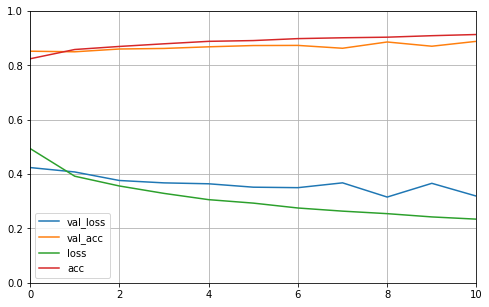

In [6]:
# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Build ConvNet model</h2>

In [13]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (5,5), input_shape=(28,28,1), use_bias=False))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Activation("relu"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
# - second 2x conv/pool
cnn_clf.add(Convolution2D(64, (3,3), use_bias=False))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Activation("relu"))
cnn_clf.add(Convolution2D(64, (3,3), use_bias=False))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Activation("relu"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
# - first fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, use_bias=False))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Activation("elu"))
cnn_clf.add(Dropout(0.3))
# - second fully connected
cnn_clf.add(Dense(128, use_bias=False))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Activation("elu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(cnn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        800       
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18432     
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 10, 10, 64)        0         
__________

<h2>Train and evaluate ConvNet model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 101s 2ms/step - loss: 0.4843 - acc: 0.8261 - val_loss: 0.3176 - val_acc: 0.8845
Epoch 2/15
48000/48000 [==============================] - 98s 2ms/step - loss: 0.3317 - acc: 0.8812 - val_loss: 0.2875 - val_acc: 0.8969
Epoch 3/15
48000/48000 [==============================] - 98s 2ms/step - loss: 0.2928 - acc: 0.8946 - val_loss: 0.2989 - val_acc: 0.8934
Epoch 4/15
48000/48000 [==============================] - 101s 2ms/step - loss: 0.2625 - acc: 0.9061 - val_loss: 0.2678 - val_acc: 0.9026
Epoch 5/15
48000/48000 [==============================] - 100s 2ms/step - loss: 0.2407 - acc: 0.9134 - val_loss: 0.2499 - val_acc: 0.9097
Epoch 6/15
48000/48000 [==============================] - 98s 2ms/step - loss: 0.2229 - acc: 0.9197 - val_loss: 0.2432 - val_acc: 0.9103
Epoch 7/15
48000/48000 [==============================] - 104s 2ms/step - loss: 0.2070 - acc: 0.9253 - val_loss: 0.2540 - val

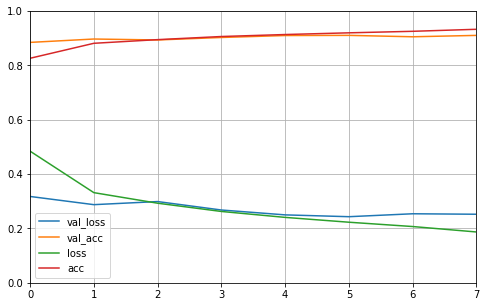

In [14]:
# Start timer
start = time.time()

# Store best model
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Train model on training data
# Note: uses 20% of the training set for validation
history = cnn_clf.fit(X_train_2D, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Confusion matrix</h2>

In [15]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[840   0  14  19   3   1 112   0  11   0]
 [  2 986   0   9   0   0   1   0   2   0]
 [  8   1 869   9  33   0  80   0   0   0]
 [ 10   6  13 911  26   0  33   0   1   0]
 [  1   0  57  30 837   0  75   0   0   0]
 [  0   0   0   0   0 976   0  10   1  13]
 [ 89   1  56  24  60   0 761   0   9   0]
 [  0   0   0   0   0  15   0 974   0  11]
 [  3   1   2   4   2   1   6   4 977   0]
 [  0   0   0   0   0   6   0  33   1 960]]


<h2>Dimensionality Reduction</h2>

In [10]:
from sklearn.decomposition import PCA

# Create PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_1D)
# Reduce dimensionality on training and test sets
X_train_1D_dr = pca.transform(X_train_1D)
X_test_1D_dr = pca.transform(X_test_1D)
# Show dataset shape
print("Training set:",X_train_1D_dr.shape)
print("Test set:",X_test_1D_dr.shape)

Training set: (60000, 187)
Test set: (10000, 187)


<h2>Train and evaluate reduced dataset with a neural network</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 103us/step - loss: 0.4866 - acc: 0.8303 - val_loss: 0.3847 - val_acc: 0.8633
Epoch 2/15
48000/48000 [==============================] - 4s 82us/step - loss: 0.3818 - acc: 0.8634 - val_loss: 0.3468 - val_acc: 0.8748
Epoch 3/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.3377 - acc: 0.8757 - val_loss: 0.3256 - val_acc: 0.8811
Epoch 4/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.3119 - acc: 0.8863 - val_loss: 0.3360 - val_acc: 0.8759
Epoch 5/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.2896 - acc: 0.8937 - val_loss: 0.3165 - val_acc: 0.8842
Epoch 6/15
48000/48000 [==============================] - 4s 83us/step - loss: 0.2730 - acc: 0.8991 - val_loss: 0.3044 - val_acc: 0.8914
Epoch 7/15
48000/48000 [==============================] - 4s 85us/step - loss: 0.2590 - acc: 0.9038 - val_loss: 0.3162 - val_ac

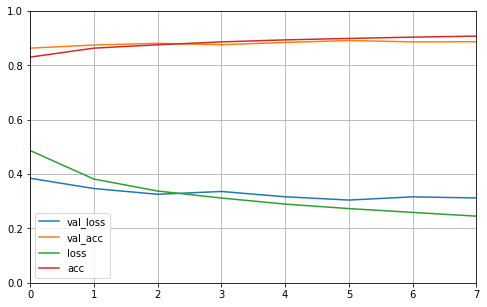

In [11]:
# Create Neural Net Softmax model for the reduced size dataset
snn_clf = Sequential()
# - first Dense
snn_clf.add(Dense(128, input_dim=187, use_bias=False))
snn_clf.add(BatchNormalization())
snn_clf.add(Activation("elu"))
# - second Dense
snn_clf.add(Dense(128, use_bias=False))
snn_clf.add(BatchNormalization())
snn_clf.add(Activation("elu"))
# - output
snn_clf.add(Dense(10, activation="softmax"))

# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Compile model
snn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = snn_clf.fit(X_train_1D_dr, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = snn_clf.evaluate(X_test_1D_dr, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


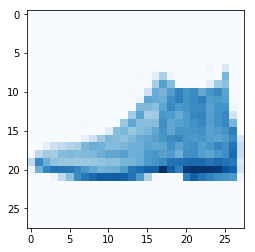

Predicted: Pullover
Actual: Pullover


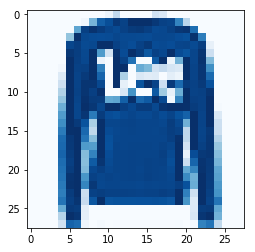

Predicted: Trouser
Actual: Trouser


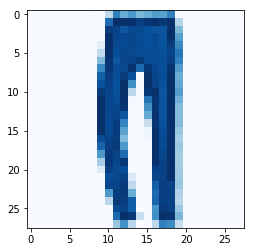

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()